# COVID-19 in Data

## Description
This dataset, provided by the CDC Case Task Force, contains COVID-19 cases and deaths by state. Updated twice daily, it presents both probable and confirmed cases and deaths as reported by public health jurisidictions. These provisional counts are subject to change as the data are adjusted over time, and because of this negative numbers can occur. Probable cases in particular can fluctuate greatly as they are reclassified to confirmed cases or are determined to be something other than COVID.

60 public health jurisdictions report COVID cases to the CDC: the 50 states, the District of Columbia, New York City, the U.S. territories of American Samoa, Guam, the Commonwealth of the Northern Mariana Islands, Puerto Rico, and the U.S Virgin Islands as well as the Federated States of Micronesia, Republic of the Marshall Islands, and Republic of Palau. New York State does NOT include New York City's data, as they report separately to the CDC.

Source: Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations,
        accessed on ‎Monday, ‎July ‎26, ‎2021, at https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

The data are through July of 2021.

## The Dataset
Number of Rows | Number of Columns | One Row Represents
------------- | ------------- | -------------
33,060 | 15 | One day for a jurisdiction

Columns  | Description | Data Type
------------- | ------------- | -------------
submission_date  | Date of counts  | Floating Timestamp
state  | Jurisdiction  | Text
tot_cases  | Total number of cases  | Number
conf_cases  | Total confirmed cases  | Number
prob_cases  | Total probable cases  | Number
new_case  | Number of new cases  | Number
pnew_case  | Number of new probable cases  | Number
tot_death  | Total number of deaths  | Number
conf_death  | Total number of confirmed cases  | Number
prob_death  | Total number of probable deaths  | Number
new_death  | Number of new deaths  | Number
pnew_death  | Number of new probable deaths  | Number
created_at  | Date and time record was created  | Floating Timestamp
consent_cases  | If Agree, then confirmed and probable cases are included. If Not Agree, then only total cases are included | Text
consent_deaths  | If Agree, then confirmed and probable deaths are included. If Not Agree, then only total deaths are included  | Text

## Objective
This notebook will focus on exploratory data analysis of the data. EDA focuses on summarizing data and gaining insight rather than formal statistical modeling, although statistical modelling can be used. Through this, we seek to understand the data and begin to formulate hypotheses for more quantitative statistical analyses.

## Libraries
This analysis will use the python libraries pandas, numpy, and matplotlib.

In [107]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Print multiple output in one cell

import datetime
#import random

## Summarizing the Data

### Reading in the Data

In [108]:
# Read in the Excel file
df = pd.read_excel("Datasets/casesanddeathsbystate.xlsx", engine = "openpyxl") # Uses openpyxl, xlrd no longer supports .xlsx files

#prc = 0.20
#dfCases = pd.read_csv("Datasets\COVID-19_Case_Surveillance_Public_Use_Data.csv", header = 0, skiprows = lambda i: i > 0 and random.random() > prc)

### First Look
First, we will get a quick summary look at the data.

In [109]:
df.describe()
df.dtypes

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,3.306000e+04,1.639100e+04,16320.000000,33060.000000,28776.000000,33060.000000,16324.000000,16324.000000,33060.000000,28716.000000
mean,2.429430e+05,2.791227e+05,32076.616544,1038.889837,142.758757,4867.958106,5135.123989,586.719738,18.221143,1.715072
std,4.668819e+05,4.681587e+05,50270.282964,2522.771593,517.483185,8558.631065,6140.616343,989.202293,47.930595,31.279644
min,0.000000e+00,0.000000e+00,0.000000,-33355.000000,-33864.000000,0.000000,0.000000,0.000000,-1465.000000,-2594.000000
25%,2.426250e+03,2.070600e+04,107.750000,18.000000,0.000000,54.000000,534.000000,1.000000,0.000000,0.000000
50%,6.146650e+04,1.121620e+05,5654.500000,267.000000,2.000000,1283.000000,2525.000000,176.500000,3.000000,0.000000
75%,2.972470e+05,3.689880e+05,40349.500000,1000.000000,106.000000,6114.000000,7283.000000,718.000000,17.000000,1.000000
max,3.941816e+06,3.772470e+06,239790.000000,63031.000000,18156.000000,63741.000000,28406.000000,5105.000000,1657.000000,2919.000000


submission_date    datetime64[ns]
state                      object
tot_cases                   int64
conf_cases                float64
prob_cases                float64
new_case                    int64
pnew_case                 float64
tot_death                   int64
conf_death                float64
prob_death                float64
new_death                   int64
pnew_death                float64
created_at         datetime64[ns]
consent_cases              object
consent_deaths             object
dtype: object

In [110]:
df.head(5) # First rows in the data start on January 22nd of 2020, where no cases or deaths were reported
df.tail(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-01-22,CA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Not agree,Not agree
1,2020-01-22,ND,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Not agree
2,2020-01-22,DE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Agree
3,2020-01-22,VI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,NaN,NaN
4,2020-01-22,WI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Agree


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
33055,2021-07-25,WY,64251,53772.0,10479.0,0,0.0,766,766.0,0.0,0,0.0,2021-07-26 13:52:25,Agree,Agree
33056,2021-07-25,LA,512843,NaN,NaN,0,0.0,10900,9842.0,1058.0,0,0.0,2021-07-26 13:52:25,Not agree,Agree
33057,2021-07-25,MN,609387,NaN,NaN,0,0.0,7743,7227.0,516.0,0,0.0,2021-07-26 13:52:25,NaN,Agree
33058,2021-07-25,OR,214869,214869.0,0.0,0,0.0,2836,2836.0,0.0,0,0.0,2021-07-26 13:52:25,Agree,Agree
33059,2021-07-25,SC,607381,500085.0,107296.0,0,0.0,9918,NaN,NaN,0,0.0,2021-07-26 13:52:25,Agree,Not agree


On the earliest reported date, January 22nd of 2020, only Alaska reported any cases of COVID, confirmed or probable. 

In [111]:
firstDay = datetime.datetime(2020, 1, 22)

df.loc[(df['tot_cases'] > 0) & (df['submission_date'] == firstDay)]

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
47,2020-01-22,AL,33,27.0,6.0,33,6.0,0,0.0,0.0,0,0.0,2020-01-24,Agree,Agree


### Progression of confirmed and probable cases
The first 3 months of 2020 showed had comparitively little confirmed or probable cases of COVID, but it quickly picked up steam. With simple bar graphs, we can see the progression of COVID over 2020 and 2021.

In [112]:
df.index = df["submission_date"] # Indexing by the date allows for easy grouping and makes sense for time-series data
df.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2021-07-25', '2021-07-25', '2021-07-25', '2021-07-25',
               '2021-07-25', '2021-07-25', '2021-07-25', '2021-07-25',
               '2021-07-25', '2021-07-25'],
              dtype='datetime64[ns]', name='submission_date', length=33060, freq=None)

In [113]:
dfGroupedMonthYear = df.groupby(by = [df.index.month, df.index.year]).sum() #Group by month and year
dfGroupedMonthYear.index.names = ["month", "year"] # Rename the indices, as they can't be reset if they match an already existing column, in this case submission_date
dfGroupedMonthYear = dfGroupedMonthYear.reset_index() # Resets the indices to the default. Gives us state, month, and year as 2 new columns

dfGroupedMonthYear["month_year"] = dfGroupedMonthYear["month"].astype(str) + "/" + dfGroupedMonthYear["year"].astype(str) # Create a new column for month + year
dfGroupedMonthYear["month_year"] = pd.to_datetime(dfGroupedMonthYear["month_year"]) # Convert new column to DateTime data type
dfGroupedMonthYear = dfGroupedMonthYear.sort_values(by = ["month_year"]) # Sort by month_year ascending
dfGroupedMonthYear.head(19)

,month,year,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,month_year
0,1,2020,415,316.0,62.0,51,8.0,0,0.0,0.0,0,0.0,2020-01-01
2,2,2020,19450,18523.0,615.0,477,29.0,4181,0.0,3.0,4,1.0,2020-02-01
4,3,2020,1596286,904514.0,8295.0,226665,978.0,29488,11855.0,1369.0,5012,326.0,2020-03-01
6,4,2020,20666894,11064633.0,184082.0,881838,13228.0,1059139,635985.0,91617.0,60687,5422.0,2020-04-01
8,5,2020,46934967,27311061.0,644049.0,754193,16361.0,2799253,1881836.0,197411.0,42036,2232.0,2020-05-01
10,6,2020,67835105,37870040.0,1178864.0,919583,20749.0,3594083,2362285.0,236760.0,20845,363.0,2020-06-01
12,7,2020,117298461,67687331.0,2018315.0,1969272,41542.0,4471922,2780020.0,303981.0,29702,346.0,2020-07-01
14,8,2020,171571501,95863263.0,3404526.0,1426782,60343.0,5473326,3172134.0,321489.0,29930,927.0,2020-08-01
15,9,2020,204026233,114951042.0,5102688.0,1224131,85961.0,6058108,3399964.0,329842.0,22019,898.0,2020-09-01
16,10,2020,256948038,144540675.0,8039511.0,1950107,167147.0,6949787,3836930.0,361747.0,24685,1195.0,2020-10-01


<BarContainer object of 19 artists>

Text(0, 0.5, 'Cases')

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Confirmed New Cases of COVID-19')

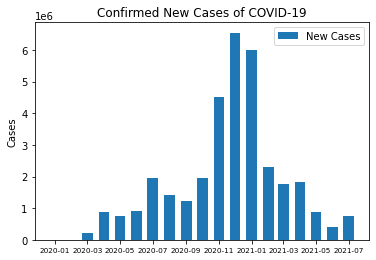

<BarContainer object of 19 artists>

Text(0, 0.5, 'Cases')

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Probable New Cases of COVID-19')

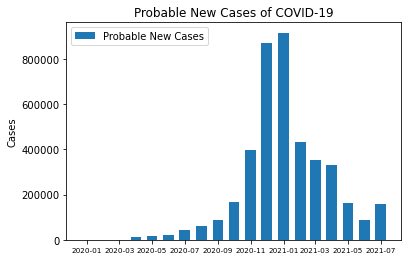

In [114]:
# Create bar graph displaying new confirmed cases by month
xLabels = dfGroupedMonthYear["month_year"]

fig, ax = plt.subplots()

ax.bar(xLabels, dfGroupedMonthYear["new_case"], width = 20, label = "New Cases")

ax.set_ylabel("Cases")
ax.legend()

plt.xticks(fontsize = 7.3)
plt.title("Confirmed New Cases of COVID-19")

plt.show()

#------------------

# Create bar graph displaying new probable cases by month

fig, ax = plt.subplots()

ax.bar(xLabels, dfGroupedMonthYear["pnew_case"], width = 20, label = "Probable New Cases")

ax.set_ylabel("Cases")
ax.legend()

plt.xticks(fontsize = 7.3)
plt.title("Probable New Cases of COVID-19")

plt.show()


We can see that the number of new and probable new cases reached its peak around December of 2020 and January of 2021. Also notable is the uptick in July of 2021, where new and probable new cases are higher than the previous month's for the first time in 2021. We can also see the new monthly cases versus new monthly deaths:

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

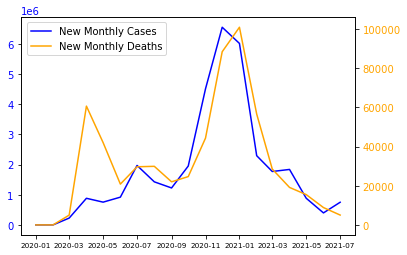

In [115]:
fig, ax = plt.subplots()

x = dfGroupedMonthYear["month_year"]
yCase = dfGroupedMonthYear["new_case"]
yDeath = dfGroupedMonthYear["new_death"]

plt.xticks(fontsize = 7.3)

ax.plot(x, yCase, color = "blue", label = "New Monthly Cases")
ax.tick_params(axis = "y", labelcolor = "blue")

ax2 = ax.twinx()
ax2.plot(x, yDeath, color = "orange", label = "New Monthly Deaths")
ax2.tick_params(axis = "y", labelcolor = "orange")

fig.legend(loc = "upper right", bbox_to_anchor = (0.45, 1), bbox_transform=ax.transAxes)

Deaths rapidly increased in April of 2020, reaching over 60,000, whereas March only had 5,000 deaths. What states had the highest and lowest confirmed cases of COVID-19?

In [116]:
notStates = ["AS", "GU", "MP", "PR", "FSM", "RMI", "PW", "VI"]
df = df.reset_index(drop = True)
dfGroupedState = df[~df["state"].isin(notStates)]
dfGroupedState.head(5)

dfGroupedState = dfGroupedState.groupby(by = [df["state"]]).sum()
dfGroupedState.head(5)

dfTop5Cases = dfGroupedState["new_case"].nlargest(5).reset_index()
dfTop5Cases.head(5)

dfBottom5Cases = dfGroupedState["new_case"].nsmallest(5).reset_index()
dfBottom5Cases.tail(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-01-22,CA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Not agree,Not agree
1,2020-01-22,ND,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Not agree
2,2020-01-22,DE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Agree
4,2020-01-22,WI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Agree,Agree
5,2020-01-22,VT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39,Not agree,Not agree


,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
state,,,,,,,,,,
AK,15338125,0.0,0.0,70751,0.0,90275,0.0,0.0,377,0.0
AL,143068500,113454525.0,29613975.0,572067,133507.0,2971012,2427306.0,543706.0,11481,2320.0
AR,85353004,0.0,0.0,375350,85675.0,1409516,0.0,0.0,6054,1237.0
AZ,217442076,204282132.0,13099883.0,917168,71519.0,4359962,3929123.0,428989.0,18171,1978.0
CA,943911373,897181468.0,30970609.0,3941352,155785.0,15449050,0.0,0.0,63593,0.0


,state,new_case
0,CA,3941352
1,TX,2996100
2,FL,2479975
3,IL,1407929
4,PA,1220115


,state,new_case
0,VT,23052
1,HI,38416
2,DC,49931
3,WY,64251
4,ME,69904


<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Total Number of Confirmed COVID-19 Cases')

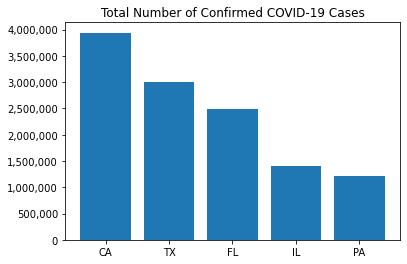

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Total Number of Confirmed COVID-19 Cases')

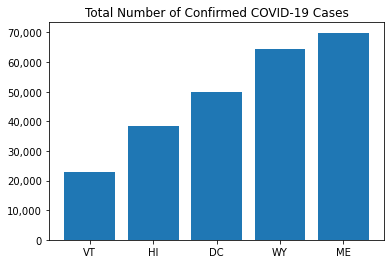

In [117]:
xLabels = dfTop5Cases["state"]
fig, ax = plt.subplots()

ax.bar(xLabels, dfTop5Cases["new_case"], label = "Total Confirmed Cases")
ax.ticklabel_format(axis = "y", style = "plain")
ax.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x), ",")))
plt.title("Total Number of Confirmed COVID-19 Cases")

plt.show()

#------------------

xLabels = dfBottom5Cases["state"]
fig, ax = plt.subplots()

ax.bar(xLabels, dfBottom5Cases["new_case"], label = "Total Confirmed Cases")
ax.ticklabel_format(axis = "y", style = "plain")
ax.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x), ",")))
plt.title("Total Number of Confirmed COVID-19 Cases")


In [118]:
df.index = df["submission_date"]
dfGroupedMonthYearState = df.groupby(by = [df["state"], df.index.month, df.index.year]).sum() # Group by state, month, year, and sum the results
dfGroupedMonthYearState.index.names = ["state", "month", "year"] # Rename the indices, as they can't be reset if they match an already existing column
dfGroupedMonthYearState = dfGroupedMonthYearState.reset_index() # Resets the indices to the default. Gives us state, month, and year as 3 new columns
dfGroupedMonthYearState.head(5)

,state,month,year,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,AK,1,2020,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
1,AK,1,2021,1547357,0.0,0.0,6991,0.0,9301,0.0,0.0,27,0.0
2,AK,2,2020,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
3,AK,2,2021,1529870,0.0,0.0,3569,0.0,8788,0.0,0.0,15,0.0
4,AK,3,2020,793,0.0,0.0,128,0.0,36,0.0,0.0,6,0.0


In [119]:
# Filter to include only Kentucky, and filter further to include only new cases and deaths, potential and confirmed. Sort by date and create new columns for a cumulative bar graph
dfKy = dfGroupedMonthYearState[dfGroupedMonthYearState["state"] == "KY"]
dfKy = dfKy.filter(items = ["state", "month", "year", "new_case", "pnew_case", "new_death", "pnew_death"])
dfKy["month_year"] = dfKy["month"].astype(str) + "/" + dfKy["year"].astype(str)
dfKy["month_year"] = pd.to_datetime(dfKy["month_year"])
dfKy = dfKy.sort_values(by = ["month_year"])

newCols = ['total_new_case', 'total_pnew_case', 'total_new_death', 'total_pnew_death']
for col in newCols:
    dfKy[col] = dfKy['new_case'].cumsum()
    dfKy[col] = dfKy['pnew_case'].cumsum()
    dfKy[col] = dfKy['new_death'].cumsum()
    dfKy[col] = dfKy['pnew_death'].cumsum()
dfKy['prev_new_case'] = dfKy['new_case'].cumsum() - dfKy["new_case"]

dfKy.head(5)

,state,month,year,new_case,pnew_case,new_death,pnew_death,month_year,total_new_case,total_pnew_case,total_new_death,total_pnew_death,prev_new_case
380,KY,1,2020,0,0.0,0,0.0,2020-01-01,0.0,0.0,0.0,0.0,0
382,KY,2,2020,0,0.0,0,0.0,2020-02-01,0.0,0.0,0.0,0.0,0
384,KY,3,2020,843,21.0,29,2.0,2020-03-01,2.0,2.0,2.0,2.0,0
386,KY,4,2020,4206,40.0,242,7.0,2020-04-01,9.0,9.0,9.0,9.0,843
388,KY,5,2020,5427,188.0,239,10.0,2020-05-01,19.0,19.0,19.0,19.0,5049


COVID cases in Kentucky, with new cases and the previous month's total:

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

Text(0, 0.5, 'Cases')

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'COVID Cases in Kentucky')

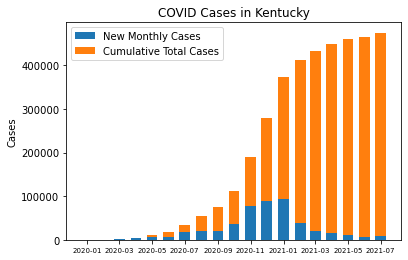

In [120]:
# Create cumulative bar graph displaying portion of new cases compared to overall cases per month
xLabels = dfKy["month_year"]
fig, ax = plt.subplots()

ax.bar(xLabels, dfKy["new_case"], width = 20, label = "New Monthly Cases")
ax.bar(xLabels, dfKy["prev_new_case"], width = 20, label = "Cumulative Total Cases", bottom = dfKy["new_case"])

ax.set_ylabel("Cases")
ax.legend()

plt.xticks(fontsize = 7)
plt.title("COVID Cases in Kentucky")
plt.show()